In [2]:
import pandas as pd
import numpy as np

## Load full data (bivariate)

In [41]:
path = 'bivariate_study'
data = '/bivariate_data'

times = [time[0] for time in pd.read_csv(path+'/output/LongitudinalMetricModel_absolute_times.txt', header=None).values]
memory = [score[0] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
hippocampus = [score[1] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+'/output/LongitudinalMetricModel_subject_ids.txt', header=None).values]

In [67]:
data = pd.DataFrame(index=[ids, times], columns=['memory', 'hippocampus'])
data['memory'] = memory
data['hippocampus'] = hippocampus
data.index.set_names(['ID','TIME'], inplace=True)
data['ID'] = data.index.get_level_values(0)
data['TIME'] = data.index.get_level_values(1)
data = data.set_index('ID')
data

,memory,hippocampus,TIME
ID,,,
4,0.407333,0.377389,74.950188
4,0.518444,0.375055,75.416328
4,0.466667,0.364087,75.882462
4,0.540667,0.382969,76.348595
4,0.511111,0.429288,77.747002
...,...,...,...
1425,0.540667,0.242699,82.017731
1425,0.607333,0.267690,82.495964
1430,0.577778,0.745385,82.255379


## Keep only the cognitive baseline

In [70]:
data_baseline = data.copy()

for sub in data.index.unique():
    sub_data = data.loc[sub]
    for visit in range(len(sub_data)):
        if visit:
            data_baseline['memory'].loc[sub].iloc[visit] = np.nan
    data_baseline.loc[sub] = sub_data.copy()

In [71]:
data_baseline

,memory,hippocampus,TIME
ID,,,
4,0.407333,0.377389,74.950188
4,0.518444,0.375055,75.416328
4,0.466667,0.364087,75.882462
4,0.540667,0.382969,76.348595
4,0.511111,0.429288,77.747002
...,...,...,...
1425,0.540667,0.242699,82.017731
1425,0.607333,0.267690,82.495964
1430,0.577778,0.745385,82.255379


In [91]:
# try to evaluate individual parameters from only the imaging data with only the baseline cognitive scores

data_baseline = data.copy()

for sub in data.index.unique(): 
    data_sub = data.loc[sub].copy()
    if type(data_sub) == pd.core.series.Series:
        continue
    for ses in range(len(data_sub)):
        if ses > 0:
            data_sub['memory'].iloc[ses] = np.nan
    data_baseline.loc[sub] = data_sub


In [92]:
data_baseline

,memory,hippocampus,TIME
ID,,,
4,0.407333,0.377389,74.950188
4,NaN,0.375055,75.416328
4,NaN,0.364087,75.882462
4,NaN,0.382969,76.348595
4,NaN,0.429288,77.747002
...,...,...,...
1425,NaN,0.242699,82.017731
1425,NaN,0.267690,82.495964
1430,0.577778,0.745385,82.255379


In [93]:
Y = data_baseline[['hippocampus', 'memory']].values

In [86]:
np.savetxt('Y_baseline.csv', Y, delimiter=',')

In [95]:
# try to evaluate individual parameters from only the imaging data with only the baseline cognitive scores

data_baseline = data.copy()

for sub in data.index.unique(): 
    data_sub = data.loc[sub].copy()
    if type(data_sub) == pd.core.series.Series:
        continue
    for ses in range(len(data_sub)):
        if ses > 0:
            data_sub['memory'].iloc[ses] = data_sub['memory'].iloc[0]
    data_baseline.loc[sub] = data_sub


In [96]:
Y = data_baseline[['hippocampus', 'memory']].values

In [97]:
np.savetxt('Y_baseline_duplicated.csv', Y, delimiter=',')

## Load the simulated_data

In [47]:
path = 'simulated_study/'
data = 'simulated_data_3/'
output_folder = 'output_3/'

times = [time[0] for time in pd.read_csv(path+data+'X.csv', header=None).values]
logistic = [score[0] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
sum_logistic = [score[1] for score in pd.read_csv(path+data+'/Y.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+output_folder+'/LongitudinalMetricModel_subject_ids.txt', header=None).values]

In [49]:
data = pd.DataFrame(index=[ids, times], columns=['logistic', 'sum_logistic'])
data['logistic'] = logistic
data['sum_logistic'] = sum_logistic
data.index.set_names(['ID','TIME'], inplace=True)
data['ID'] = data.index.get_level_values(0)
data['TIME'] = data.index.get_level_values(1)
data = data.set_index('ID')
data

,logistic,sum_logistic,TIME
ID,,,
0,0.269384,0.466165,56.340559
0,0.262788,0.461054,56.840559
0,0.252891,0.440507,57.340559
0,0.271419,0.462206,57.840559
0,0.261381,0.477437,58.340559
...,...,...,...
199,0.686590,0.919476,72.828851
199,0.694015,0.922010,73.328851
199,0.699477,0.911478,73.828851


## Delete random visits

In [50]:
data_pruned = data.copy()
delete_n_sessions = 4

for sub in data.index.unique():
    sub_data = data.loc[sub]
    for i in range(delete_n_sessions):
        deleted_visit = np.random.randint(len(sub_data))
        # For some reason, condensing the two following lines doesn't work (it then copies the df)
        sub_data['logistic'].iloc[deleted_visit] = np.nan
        sub_data['sum_logistic'].iloc[deleted_visit] = np.nan
    data_pruned.loc[sub] = sub_data.copy()

<ipython-input-50-d2a11c4f18b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['logistic'].iloc[deleted_visit] = np.nan
<ipython-input-50-d2a11c4f18b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['sum_logistic'].iloc[deleted_visit] = np.nan


In [51]:
data_pruned

,logistic,sum_logistic,TIME
ID,,,
0,NaN,NaN,56.340559
0,NaN,NaN,56.840559
0,0.252891,0.440507,57.340559
0,NaN,NaN,57.840559
0,0.261381,0.477437,58.340559
...,...,...,...
199,NaN,NaN,72.828851
199,0.694015,0.922010,73.328851
199,0.699477,0.911478,73.828851


In [52]:
Y = data_pruned[['logistic', 'sum_logistic']].values

In [57]:
np.savetxt(path+'simulated_data_3/Y_pruned.csv', Y, delimiter=',')

## Load the three features from ADNI 

In [74]:
data = pd.read_csv('adni_study/data_adni/ADNI_Hip_Ven_adas.csv')
data = data.dropna()
data.describe()

,ID,TIME,HIPPOCAMPUS,VENTRICLES,adas_memory
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,3866.592967,73.723296,0.500200,0.458716,0.196367
std,1121.961890,7.158395,0.153419,0.177107,0.142040
min,21.000000,55.085000,0.004052,0.000000,0.000000
25%,2407.000000,68.755000,0.395095,0.327040,0.098340
50%,4294.000000,73.550000,0.494029,0.464092,0.170000
75%,4578.000000,78.450000,0.602374,0.580890,0.263340
max,5290.000000,93.514000,1.000000,0.999888,1.000000


In [75]:
data['adas_memory'] *= 1.8

In [76]:
data['adas_memory'].loc[data.loc[data['adas_memory'] > 1].index] = 1

/home/benoit.sautydechalon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [77]:
data.describe()

,ID,TIME,HIPPOCAMPUS,VENTRICLES,adas_memory
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,3866.592967,73.723296,0.500200,0.458716,0.347370
std,1121.961890,7.158395,0.153419,0.177107,0.233918
min,21.000000,55.085000,0.004052,0.000000,0.000000
25%,2407.000000,68.755000,0.395095,0.327040,0.177012
50%,4294.000000,73.550000,0.494029,0.464092,0.306000
75%,4578.000000,78.450000,0.602374,0.580890,0.474012
max,5290.000000,93.514000,1.000000,0.999888,1.000000


In [78]:
X = np.array(data['TIME'])
Y = np.array(data[['HIPPOCAMPUS', 'VENTRICLES', 'adas_memory']])
group = np.array(data['ID'])

In [79]:
np.savetxt('adni_study/data_adni/Y_adas.csv', Y, delimiter=',')
np.savetxt('adni_study/data_adni/X.csv', X, delimiter=',')
np.savetxt('adni_study/data_adni/group.csv', group, delimiter=',')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'TIME'}>],
       [<AxesSubplot:title={'center':'HIPPOCAMPUS'}>,
        <AxesSubplot:title={'center':'VENTRICLES'}>],
       [<AxesSubplot:title={'center':'adas_memory'}>, <AxesSubplot:>]],
      dtype=object)

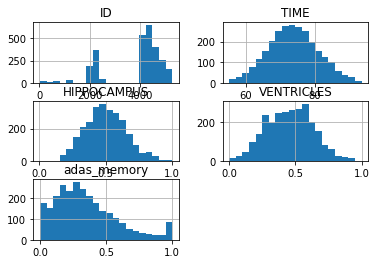

In [80]:
data.hist(bins=20)

In [82]:
data = pd.read_csv('adni_study/data_adni/ADNI_Hip_Ven_adas.csv')
data = data.dropna()
data.describe()

,ID,TIME,HIPPOCAMPUS,VENTRICLES,adas_memory
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,3866.592967,73.723296,0.500200,0.458716,0.196367
std,1121.961890,7.158395,0.153419,0.177107,0.142040
min,21.000000,55.085000,0.004052,0.000000,0.000000
25%,2407.000000,68.755000,0.395095,0.327040,0.098340
50%,4294.000000,73.550000,0.494029,0.464092,0.170000
75%,4578.000000,78.450000,0.602374,0.580890,0.263340
max,5290.000000,93.514000,1.000000,0.999888,1.000000


In [83]:
data['adas_memory'] *= 1.8

In [84]:
data['adas_memory'].loc[data.loc[data['adas_memory'] > 1].index] = 1

/home/benoit.sautydechalon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [85]:
data.describe()

,ID,TIME,HIPPOCAMPUS,VENTRICLES,adas_memory
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,3866.592967,73.723296,0.500200,0.458716,0.347370
std,1121.961890,7.158395,0.153419,0.177107,0.233918
min,21.000000,55.085000,0.004052,0.000000,0.000000
25%,2407.000000,68.755000,0.395095,0.327040,0.177012
50%,4294.000000,73.550000,0.494029,0.464092,0.306000
75%,4578.000000,78.450000,0.602374,0.580890,0.474012
max,5290.000000,93.514000,1.000000,0.999888,1.000000


In [86]:
X = np.array(data['TIME'])
Y = np.array(data[['VENTRICLES', 'adas_memory']])
group = np.array(data['ID'])

In [87]:
np.savetxt('adni_study/data_adni/Y_adas.csv', Y, delimiter=',')
np.savetxt('adni_study/data_adni/X.csv', X, delimiter=',')
np.savetxt('adni_study/data_adni/group.csv', group, delimiter=',')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'TIME'}>],
       [<AxesSubplot:title={'center':'HIPPOCAMPUS'}>,
        <AxesSubplot:title={'center':'VENTRICLES'}>],
       [<AxesSubplot:title={'center':'adas_memory'}>, <AxesSubplot:>]],
      dtype=object)

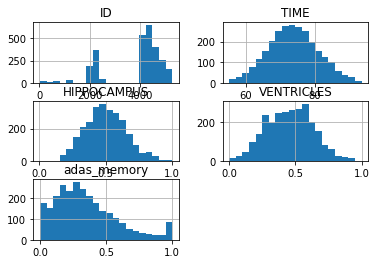

In [80]:
data.hist(bins=20)